# Matrix Model Intercomparison Project: Traceability Analysis
<p>We use the <a href="https://github.com/MPIBGC-TEE/bgc_md2">bgc_md2</a> package infrastructure to compare two or more models using traceability analysis approach (<a href="https://doi.org/10.1111/gcb.12172">Xia et al. 2013</a>, <a href="https://doi.org/10.5194/bg-14-145-2017">Luo et al. 2017</a>, <a href="https://doi.org/10.1002/2017MS001004">Jiang et al. 2017</a>) modified for transient simulations of the TRENDY model intercomparison project. </p>
<p>The biogeochemical models from the TRENDY project have been reconstructed from literature using matrix approach (<a href="https://doi.org/10.1029/2002GB001923">Luo et al. 2003</a>, <a href=" https://doi.org/10.1111/gcb.12766">2015</a>, <a href="https://doi.org/10.5194/gmd-5-1045-2012">Sierra et al. 2012</a>) and <a href="https://www.sympy.org/en/index.html">sympy</a> python package in the <a href="https://github.com/MPIBGC-TEE/bgc_md2">bgc_md2</a> database. Currently the models are simplified to be driven by NPP and thus omitting explicit simulation of leaf processes and autotrophic respiration. Data assimilation (<a href=" https://doi.org/10.1890/09-1275.1">Luo et al. 2011</a>, <a href="https://doi.org/10.1002/2015GB005239">2015</a>) was used to optimize parameters of reconstructed models to fit TRENDY output.</p>
<p>Currently our analysis includes the following steps:
<ol>
<li>We start by comparing model outputs - <em><strong>C storage</strong></em> ($X$) over time. Then we compute and compare traceable components to investigate sources of discrepancy between model predictions of C storage, and thus sources of uncertainty in our understanding of global C dynamics. </li>
<li>We compute <em><strong>C storage capacity </strong></em> $X_{C}$ for each model. $X_{C}$ (as a function of time) represents the maximum C storage for the system under current conditions. 
It is a theoretically predicted steady state of the autonomous system that we would obtain if we froze our original non-autonomous system at time point $t_{freeze}$ keeping the conditions (C input and environmental factors) constant after $t_{freeze}$. While $X_{C}$ is not a correct prediction for the solution $X$ of the original time dependent system, it is rather a momentary characteristic of the system that depends on conditions at each point in time.  
$X_{C}$ is an attractor of the frozen autonomous system, although it is not attracting the real solution  $X$. In a non-autonomous system with variable C input and environmental factors (such as temperature and moisture)  <em><strong>ecosystem</strong></em> $X$ (if we consider ecosystem as a whole - as a <em>"surrogate" 1-pool system</em>, not pool-wise) is constantly chasing $X_{C}$, but cannot consistently reach it due to variable conditions: when $X_{C}$ &gt $X$, $X$ is increasing, and when $X_{C}$ &lt $X$, $X$ is decreasing.</li>
<li>The difference between $X_{C}$ and $X$ at each point in time is called  <em><strong>C storage potential </strong></em>($X_{P}$): it shows how far the current C storage of the system is from the theoretical steady state (in a positive or negative direction).</li> 
<li>$X_{C}$ of each model depends on <em><strong>C input</strong></em> (in our case - $NPP$) and <em><strong>Equilibrium Residence Time </strong></em>($RT$). We compare $NPP$ and $RT$ for each model and attribute the contribution of $NPP$ and $RT$ to the discrepancy of $X_{C}$.</li>
<li>$RT$ represents the time which it would take on average for C particle to exit the system after it entered it, if the system was at the equilibrium. In a transient simulation, where the system is not at the steady state, $RT$ becomes a dynamic model characteristic that can be interpreted as a measure of the inverse C turnover rate of the system at each point in time. $RT$ depends on the model structure and on environmental factors. To single out environmental effects we determine <em><strong>temperature</strong></em> and <em><strong>moisture sensitivity</strong></em> of $RT$, and compare it between models. We also compare $RT$ at fixed temperatures and moisture conditions (gauge conditions) including minimum, maximum and mean conditions across the period of the simulation.</li>
<li> Based on the traceable components: $NPP$, $RT$, <em><strong>temperature</strong></em> and <em><strong>moisture sensitivity</strong></em> of $RT$, we can make conclusions regarding the inherent similarity/dissimilarity between the models and single out mechanisms that contribute most to the discrepancy of C predictions. 
</ol>
<p>The analysis is currently performed for total global C storage, including vegetation and soil parts. <br> Next steps to expand the analysis may include the following: </p>
<ul>
<li>Explore temperature and moisture sensitivities of major fluxes (e.g. litter decomposition, soil respiration);</li> 
<li>Separetely compare vegetation and soil components for each model;</li> 
<li>Investigate differences over different biomes;</li>
<li>Include additional diagnostic variables (e.g. transit time, carbon use efficiency, etc.);</li>
<li>Expand models by explicitly including autotrophic processes (start from GPP as C input);</li>
<li>Include sensitivity to more environmental factors and anthropogenic disturbances</li>
</ul>
<p>The short description of methodology for deriving traceable components is given below. </p>

In [1]:
from IPython.display import Markdown, display
display(Markdown("TracebilityText.md"))

---
jupyter:
  jupytext:
    text_representation:
      extension: .md
      format_name: markdown
      format_version: '1.3'
      jupytext_version: 1.13.6
  kernelspec:
    display_name: Python 3 (ipykernel)
    language: python
    name: python3
---

<!-- #region -->
### Traceability analysis  

#### Outline
The traceability analysis defines several diagnostic variables using as much algebraic structure of the mass balance equation as is available.
Not all diagnostic variables are possible for all compartmental models. 

We chose here to introduce the diagnostic variables not all at once but rather in the order of decreasing generality.

The first diagnostic variables are available for all compartmental models and need no additional assumptions. 
In the later parts of this section we then assume to be able to identify more and more specific terms in the mass balance equation and use those to derive and trace ever more specific diagnostics.
Thus the very first part is valid for all models but how many of the later parts are applicable to a specific model  depends on how much we know about it.  


#### Derivation of the matrix decomposition 
Compartmental models (well mixed mass balanced) can be written in as an ordinary differential equation in matrix form that relates the momentary value of the (time) derivative $\frac{d X}{d t}$ of an yet unknown function $X$ to the momentary value of $X$ itself.   
$$
\frac{d X}{d t}= I(X,t) + \tilde{M}(X,t) X \quad (1)   
$$ 
where $X$ is the statevector representing the pool contents, $\tilde{M}$ the "Compartmental matrix" and $I$ the input vector.
In Yiqi's group equation (1) is usually written with the negative Compartmental Matrix $M=-\tilde{M}$ 

$$
\frac{d X}{d t}= I(X,t) - M(X,t) X \quad (2)   
$$ 

Together with a startvalue $X_0$ it constitutes an "initial value problem" (ivp) which can be solved numerically by moving step by step forward in time.

Note: 

It is mathematical standard notation to use $X$ in the *formulation* of the ivp (representing the momentary value) althoug *after we have solved it* the solution is expressed as function of time $X(t)$. This avoids confusion since everything appering with arguments is recognizable as explicitly calculable *before* we have solved the ivp.

The system is "nonautonomous" (if they depend on time $t$) and "nonlinear" if the dependent on $X$.
It is always possible to factorize $M(X,t)$ into a product $M=A(X,t) K(X,t)$ where $K$ is a  diagonal matrix.
and $I=B(t)*u(t)$ where $u$ is a scalar.
Using these we arrive at 
$$
\frac{d X}{d t}=B(X,t) u(X,t) - A(X,t) K(X,t) X   
$$

##### Linearity assumption
If we assume the model to be linear and nonautonomous the dependency on $X$ vanishes and we have

$$
\frac{d X}{d t}= A(t) K(t) X + B(t) u(t) . 
$$

##### Factorizability  assumption
Although this is not possible in general in many published models the nonautonous part  can be further localized into a diagonal matrix $\xi(t)$ so that we can achieve constant $A$ and $K$ which allows more specific interpretation.

$$
\frac{d X}{d t}= B(t)u(t) - A \xi(t) K X 
$$

##### Factorizability of $\xi$ assumption 
In some cases we can resolve $\xi$ further.
$$
\frac{d X}{d t}= B(t)u(t) - A \xi_{temp}(t) \xi_{mois}(t) K X  
$$

#### Definition of diagnostic variables

##### Storage capacity $X_c$ and storage potential $X_p$
These variables can be defined for any compartmental system and do not require either linearity nor factorizability. 
We can rearrange eq. $(1)$ and give names to the two summands. 
$$
X = M^{-1}(X,t) \left(I(X,t)- \frac{d X}{d t} \right) \\ 
  = \underbrace{M^{-1}(X,t)I(X,t)}_{X_c} - \underbrace{M^{-1}(X,t) \frac{d X}{d t} }_{X_p} \\
  = X_c - X_p
$$
Note:
This is not to be read as a recipe to compute $X$.
The equation becomes a bit clearer if we adapt the nomenclature to express that we *have solved the ivp* and know its solution $X(t)$  
and therefore also  the derivative $\frac{d X}{d t}=I(X(t),t) - M(X(t),t) X(t) =\dot{X}(t)$ 
By substituting the solution $X(t)$ we get the recipes to compute:
$$
\dot{X}(t) = I(X(t),t) - M(X(t),t) X \\
X_c(t) = X(t)-X_p(t) \\ 
X_p(t) = M^{-1}(X(t),t)I(X,t) \\ 
$$
we see that all the ingredients become explicit functions of time.   
Since all values are taken at the same time $t$ we can drop the time dependence
in the notation and write an equation we can use in the iterator.
$$
\dot{X} = I - M X \\
X_c = X + X_p \\ 
X_p = M^{-1}I  \\ 
$$

##### Residence time
The influx $I$ can always be written as $I=b u$ where the scalar $u=\sum_{k=1\dots n} I_k$  and the dimensionless vector $b=I/u$ where $\sum_{k=1\dots n} b_k =1$.
Assumimg that the pool contents (the components of $X$)  have dimension $mass$ we can infer from eq. (1) that $M$ has dimension $\frac{1}{time}$.
The components of the (inverse) matrix $M^{-1}$ have therefore dimension $time$. Accordingly the product $RT= M^{-1} b$ is a vector of the same shape as $X$  whose components have dimesion $time$.
In the context of the Traceability Framework $RT$ is therefore called *residence time*.

Notes on nomenclature: 
1. The term *residence time* is not universally used with the same connotation outside the context of the *Traceability Analysis*.

1. It is not *the time of residence* of the particles in the system for the following reasons:
    1. In well mixed systems particles can reside in a pool for different times from zero to infinity.
    1. You could compute the mean of these times over all particles exiting a pool, but even then the result is in general not equal to the above mentioned $rt$.
    1. The mean residence time would only coincide with the definition above if the system was in equilibrium (which it clearly is not as e.g $NPP(t)$ shows.)
    1. The origin of the term is probably most easily understood as the generalization of a one dimensional rate equation $\frac{d}{dt} x = m x + u$ 
       If $r$ and $u$ are constant then the mean residence time is $rt= m^{-1}$. If we start with the rate as property of the model the *residence time* 
       can be defined as the inverse of this rate. The above definition is the generalization of this simple relationship to matrices and vectors.
       The matrix $M^{-1}$ takes the role of the number $\frac{1}{m}$ . In the context of the *Traceability Analysis* $M^{-1}$ is called *Chasing Time*. 

<!-- #endregion -->

```python

```


### Loading required packages  and functions

In [2]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
from functools import lru_cache
import general_helpers as gh
from bgc_md2.resolve.mvars import (
    CompartmentalMatrix,
    InputTuple,
    StateVariableTuple
)

### Selecting models to compare

In [19]:
# define models to compare as a dictionary (folder name : model name)
model_names={
    "yz_jules": "JULES",
    "kv_visit2": "VISIT",
    "jon_yib": "YIBs",
    "kv_ft_dlem": "DLEM",
    #"Aneesh_SDGVM":"SDGVM",
    #"cj_isam": "ISAM",
    "bian_ibis2":"IBIS",
    #"ORCHIDEE-V2":"OCN",
}

# selecting colors for plotting models
model_cols={
    "yz_jules": "blue",
    "kv_visit2": "orange",
    "jon_yib": "green",
    "kv_ft_dlem": "red",
    "Aneesh_SDGVM":"yellow",
    "cj_isam": "purple",
    "bian_ibis2":"magenta",
    "ORCHIDEE-V2":"teal",
}

### Exploring model structures

In [4]:
# bgc_md2 automatically generates a flow diagram, input allocation vector and compartmental matrix for each model
comparison_table=gh.model_table(model_names)
comparison_table

{VegetationCarbonOutFluxesBySymbol,AggregatedVegetation2SoilCarbonFlux,VegetationCarbonInFluxesBySymbol,VegetationCarbonCompartmentalMatrix,VegetationCarbonInternalFluxesBySymbol,CarbonOutFluxesBySymbol,CompartmentalMatrix,CarbonInFluxesBySymbol,InputTuple,LuoXiDiagonalMatrix,CarbonInternalFluxesBySymbol}
{VegetationCarbonOutFluxesBySymbol,CarbonInputTuple,AggregatedVegetation2SoilCarbonFlux,VegetationCarbonInFluxesBySymbol,VegetationCarbonCompartmentalMatrix,InternalFluxesBySymbol,VegetationCarbonInternalFluxesBySymbol,CarbonOutFluxesBySymbol,CompartmentalMatrix,OutFluxesBySymbol,CarbonInFluxesBySymbol,VegetationCarbonInputTuple,InFluxesBySymbol,SmoothReservoirModel,CarbonCompartmentalMatrix,InputTuple,LuoXiDiagonalMatrix,CarbonInternalFluxesBySymbol}
{VegetationCarbonInFluxesBySymbol,CarbonInputPartitioningTuple,CarbonInFluxesBySymbol,CarbonInternalFluxesBySymbol,CarbonInputTuple,VegetationCarbonInternalFluxesBySymbol,OutFluxesBySymbol,VegetationCarbonInputTuple,CarbonInputScalar,Smo

### Loading TRENDY data and model parameters

In [5]:
# define same step size for each model (in days)
delta_t_val=30
# load data and parameters
model_folders=[(k) for k in model_names]
test_arg_list=gh.get_test_arg_list(model_folders)

# fixme mm 8-12: 
# it would make sense to create a dictionary indexed by the model name 
# so it can be used for model comparisons by name like this one
test_args_dictionary={mf: gh.test_args(mf) for mf in model_folders}

Loading data and parameters for yz_jules model...
0.809417438271605
0.8095883969907407
reading  tsl , size is  (3840, 4, 144, 192)
{InputTuple,CompartmentalMatrix}
{InternalFluxesBySymbol,CompartmentalMatrix,OutFluxesBySymbol,InFluxesBySymbol,SmoothReservoirModel,InputTuple}
{InternalFluxesBySymbol,CompartmentalMatrix,OutFluxesBySymbol,InFluxesBySymbol,SmoothReservoirModel,InputTuple}
Loading data and parameters for kv_visit2 model...
 Found cached global mean files. If you want to recompute the global means
            remove the following files: 
/home/data/VISIT/test/VISIT_S2_cVeg_gm.nc
/home/data/VISIT/test/VISIT_S2_cLitter_gm.nc
/home/data/VISIT/test/VISIT_S2_cSoil_gm.nc
/home/data/VISIT/test/VISIT_S2_rh_gm.nc
/home/data/VISIT/test/VISIT_S2_gpp_gm.nc
/home/data/VISIT/test/VISIT_S2_ra_gm.nc
/home/data/VISIT/test/VISIT_S2_mrso_gm.nc
/home/data/VISIT/test/VISIT_S2_tas_gm.nc
Loading data and parameters for jon_yib model...
 Found cached global mean files. If you want to recompute the 

### Checking data assimilation quality for all models

Matrix version vs original Trendy output: yz_jules

Amount of variance explined: 
cVeg : 0.862
cSoil : -38.827
rh : -1.713
fVegSoil : 0.167


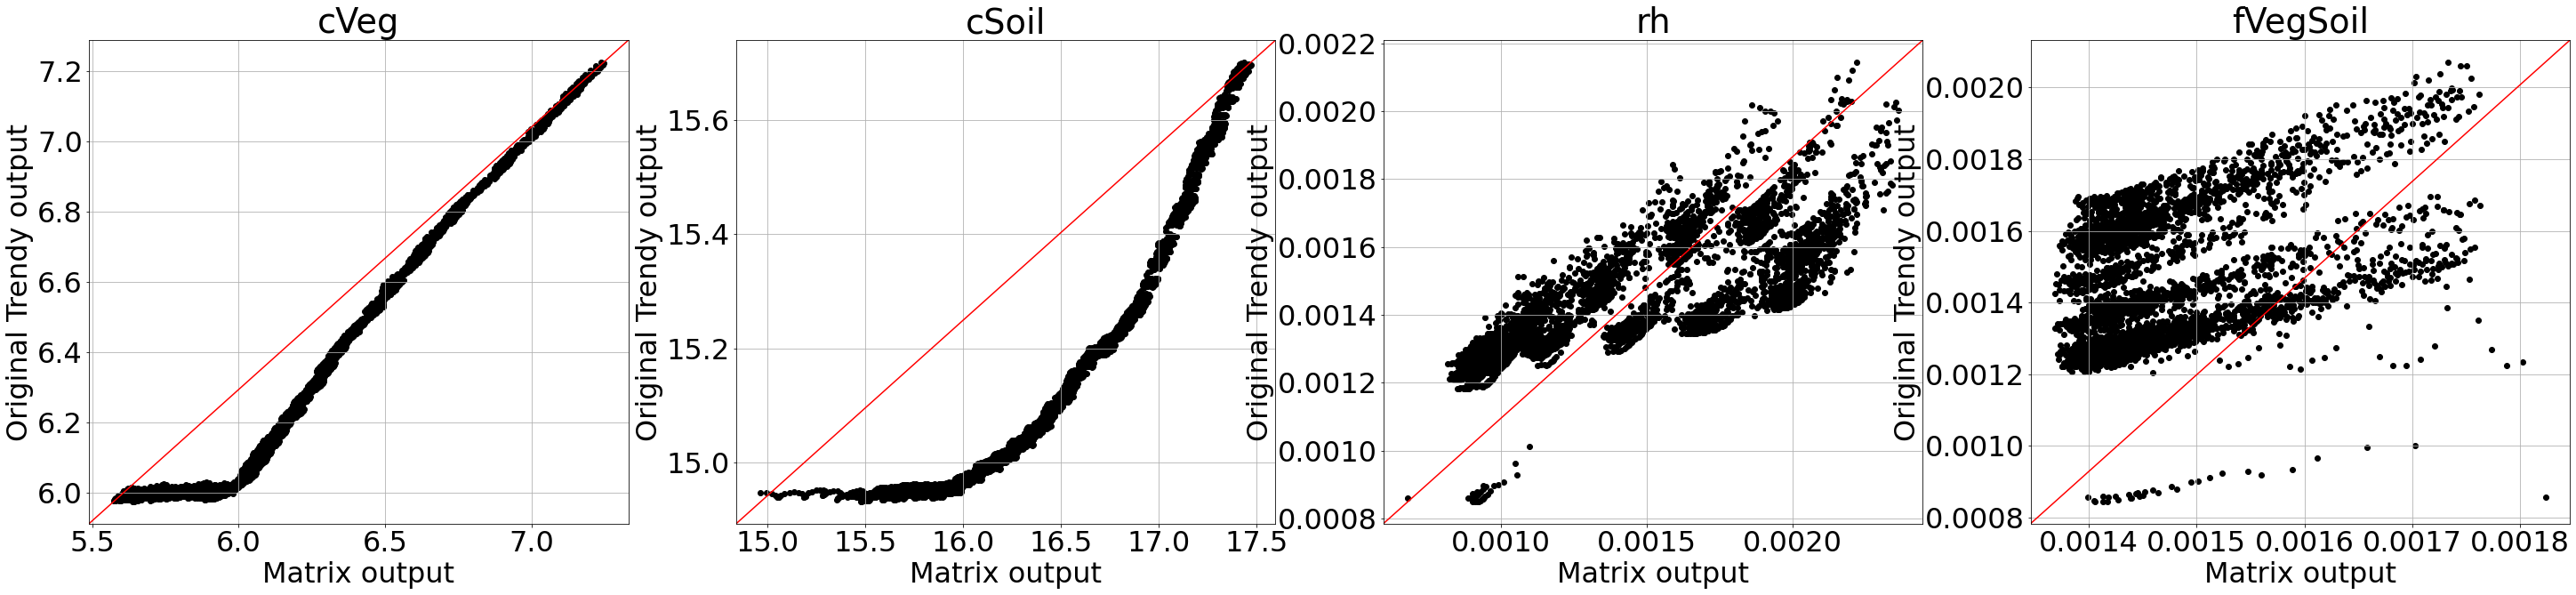

Matrix version vs original Trendy output: kv_visit2

Amount of variance explined: 
cVeg : 0.981
cLitter : 0.919
cSoil : 0.997
rh : 0.742


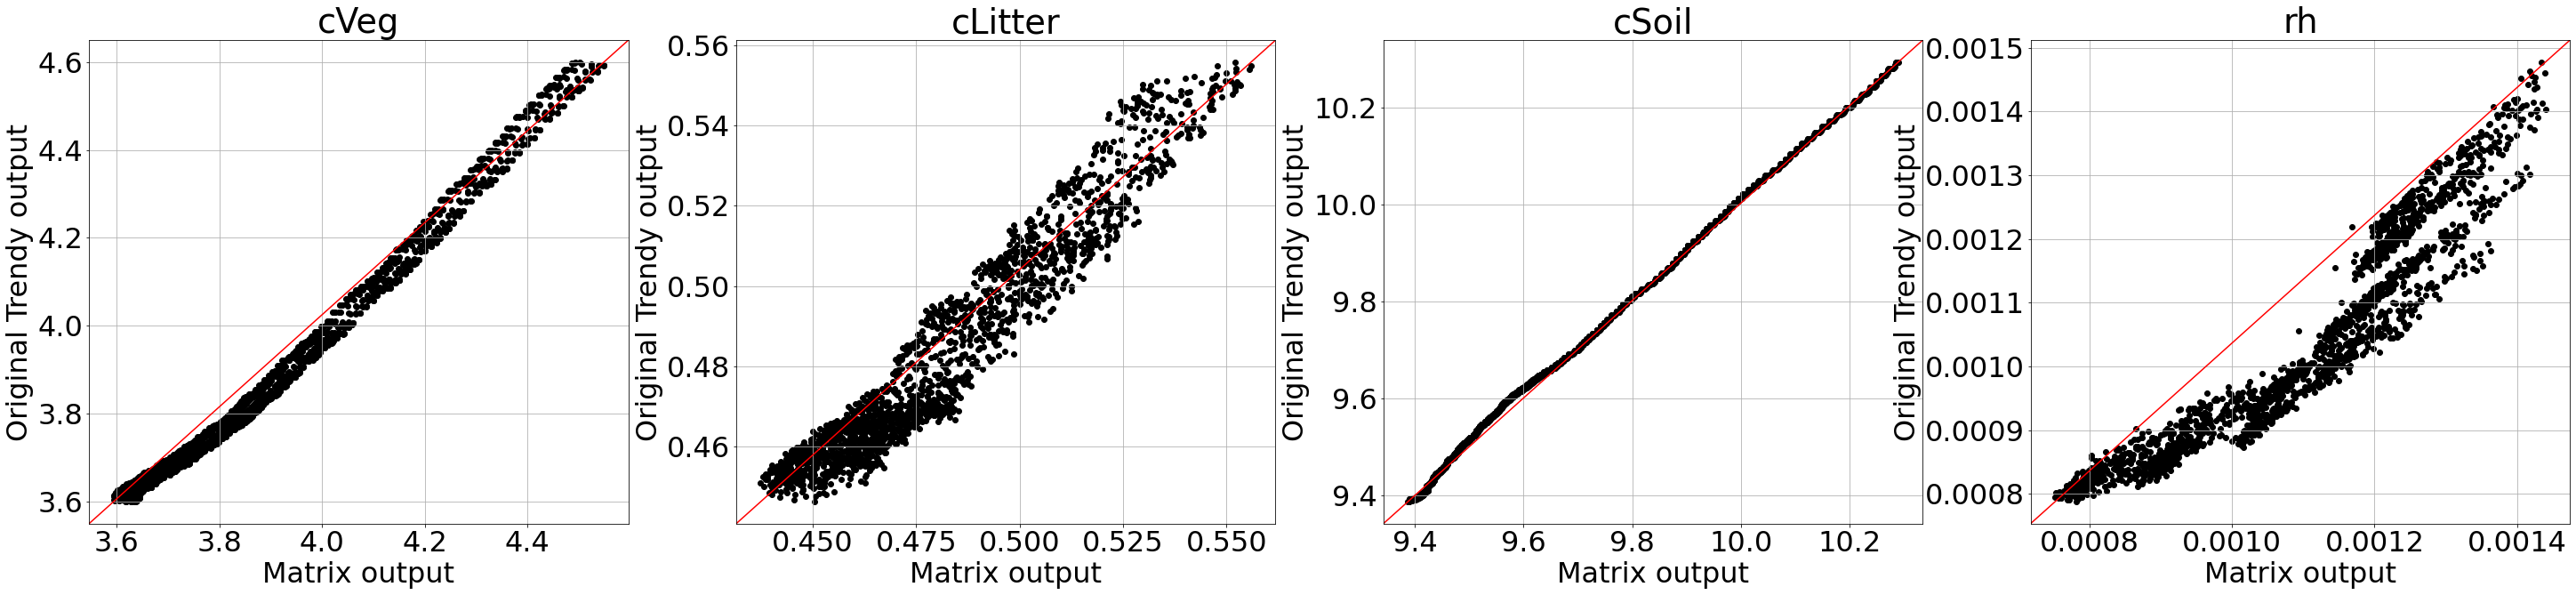

Matrix version vs original Trendy output: jon_yib

Amount of variance explined: 
cVeg : -14.93
cSoil : -0.939
rh : 0.753


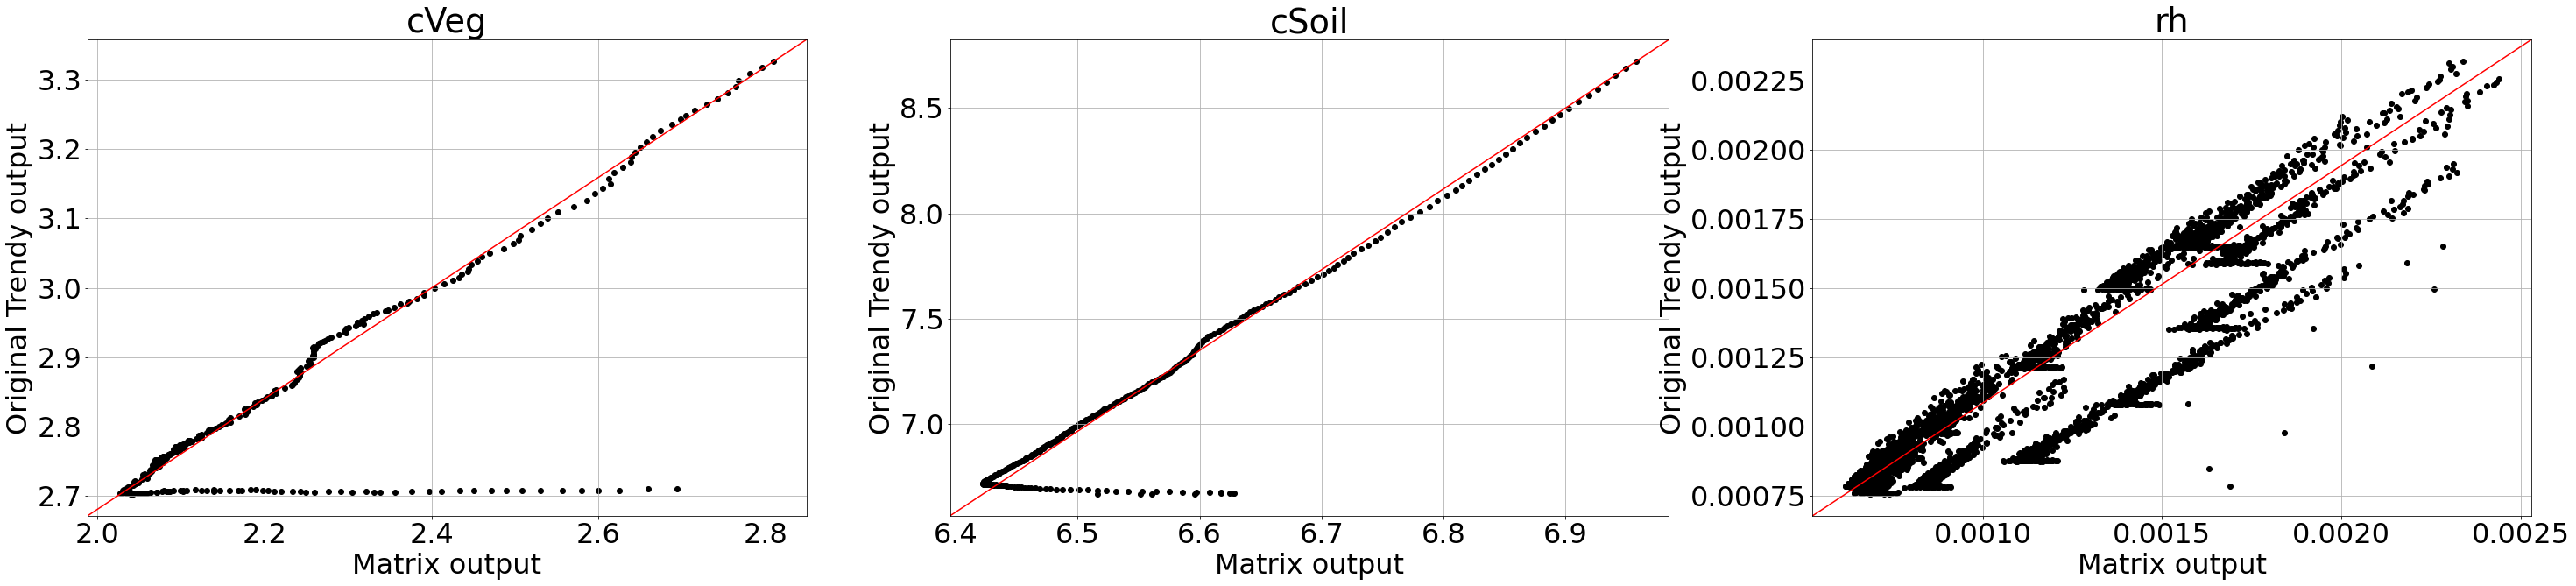

Matrix version vs original Trendy output: kv_ft_dlem

Amount of variance explined: 
cVeg : 0.543
cLitter : 0.372
cSoil : -68.135
rh : -0.056


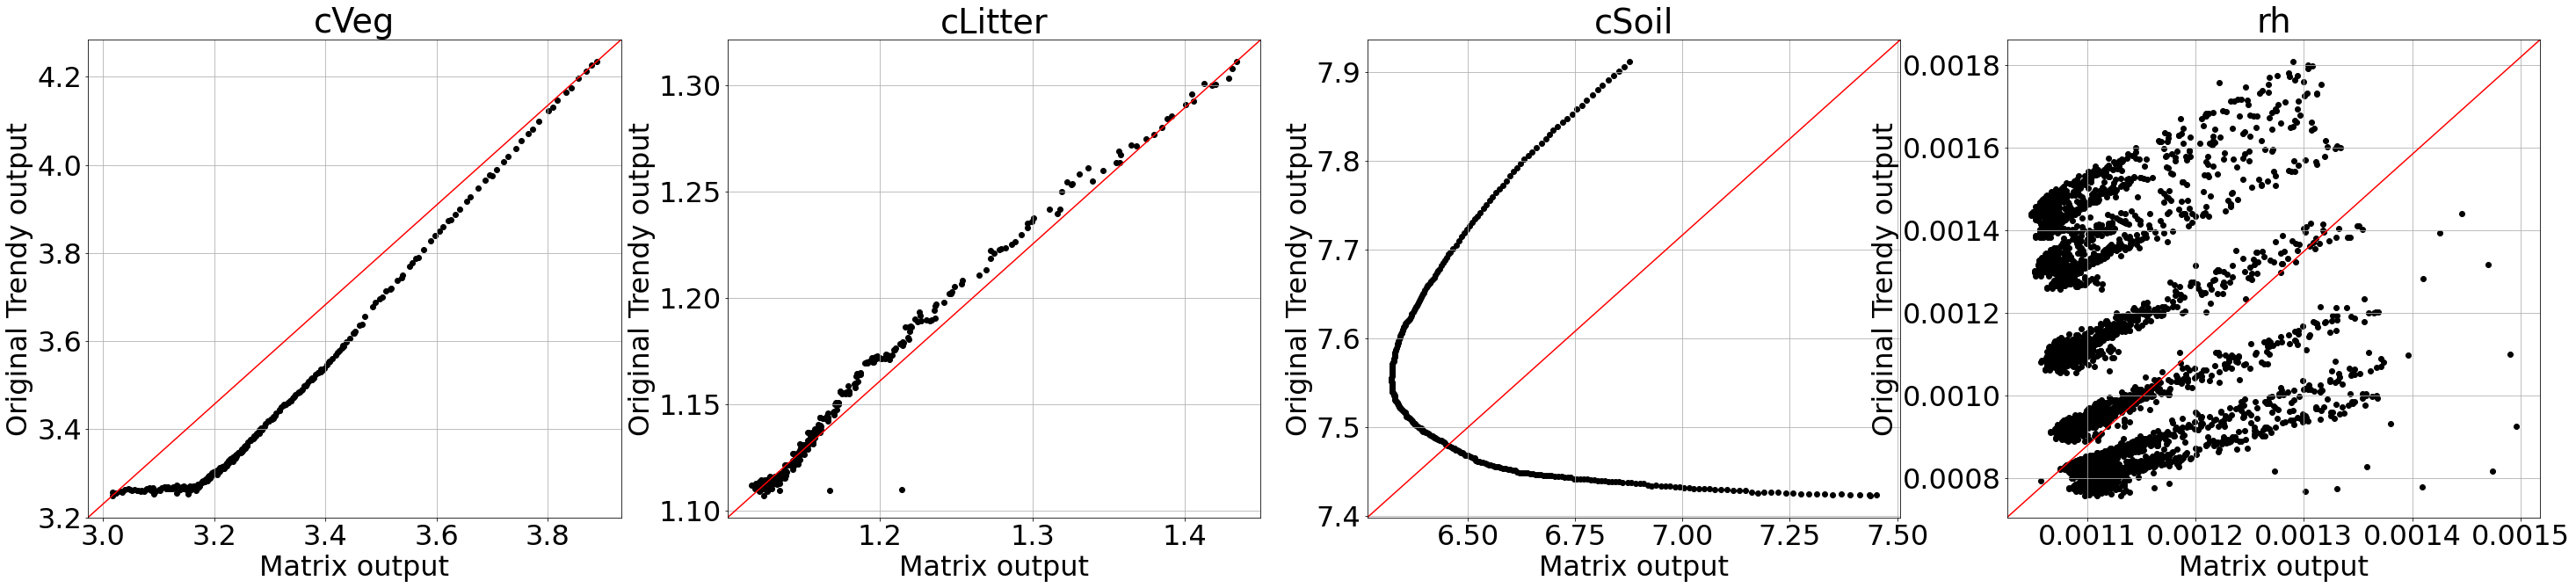

In [6]:
import matplotlib.lines as mlines
plt.rcParams.update({'font.size': 32})
for j, mf in enumerate(model_folders):
    print ('\033[1m'+"Matrix version vs original Trendy output: "+ mf)
    print ('\033[0m')
    fig = plt.figure(figsize=(50,10))
    axs=fig.subplots(1, len(gh.msh(mf).Observables._fields))
    
    mvs=test_arg_list[j].mvs
    dvs=test_arg_list[j].dvs
    cpa=test_arg_list[j].cpa
    epa_opt=test_arg_list[j].epa_opt
    
    param2res_sym = gh.msh(mf).make_param2res_sym(mvs,cpa,dvs)
    out_simu=param2res_sym(epa_opt)._asdict()
    obs=test_arg_list[j].svs._asdict()
    print ("Amount of variance explined: ")
    for i,f in enumerate(gh.msh(mf).Observables._fields):
        resid=out_simu[f]-obs[f]
        mean_obs = obs[f].mean()
        mean_centered_obs = obs[f] - mean_obs
        AVE=1 - np.sum( resid**2) / np.sum( mean_centered_obs**2 )
        print(f+ " : " + str(round(AVE,3)) )
    for i,f in enumerate(gh.msh(mf).Observables._fields):
        axs[i].scatter(out_simu[f], obs[f], c='black')
        line = mlines.Line2D([0, 1], [0, 1], color='red')
        transform = axs[i].transAxes
        line.set_transform(transform)
        axs[i].add_line(line)
        axs[i].set_title(f)
        axs[i].set_xlabel('Matrix output')
        axs[i].set_ylabel('Original Trendy output')
        axs[i].grid()
    plt.show()

### Plots of traceable components

Plotting x for yz_jules model
Plotting x for kv_visit2 model
Plotting x for jon_yib model
Plotting x for kv_ft_dlem model
Plotting u for yz_jules model
Plotting u for kv_visit2 model
Plotting u for jon_yib model
Plotting u for kv_ft_dlem model
Plotting rt for yz_jules model
Plotting rt for kv_visit2 model
Plotting rt for jon_yib model
Plotting rt for kv_ft_dlem model


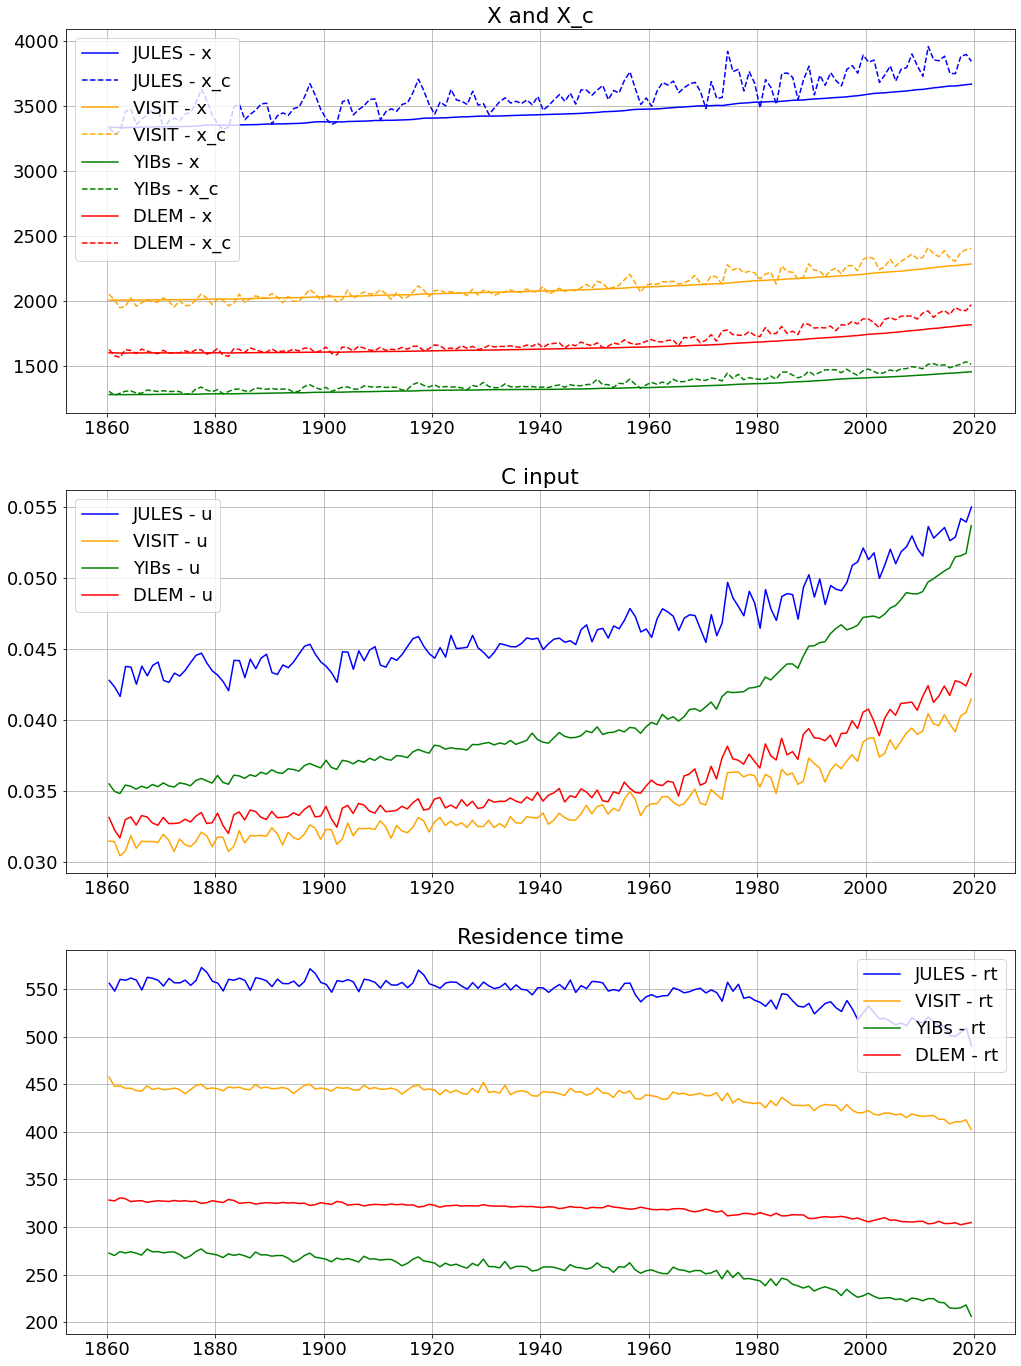

In [7]:
plt.rcParams.update({'font.size': 18})
var_names={
    "x": "X and X_c",
    #"x_p": "X_p",
    "u": "C input",
    "rt": "Residence time",
}
gh.plot_components_combined(model_names=model_names,
                        test_arg_list=test_arg_list,   
                        var_names=var_names,
                        delta_t_val=delta_t_val,
                        model_cols=model_cols,
                        part=1,
                        averaging=12*30//delta_t_val # yearly averaging
                       )

In [8]:
# gh.plot_x_xc(model_names=model_names,
#              test_arg_list=test_arg_list,
#              delta_t_val=delta_t_val, 
#              model_cols=model_cols,
#              part=1,
#              averaging=12,
#              overlap=True
#              )

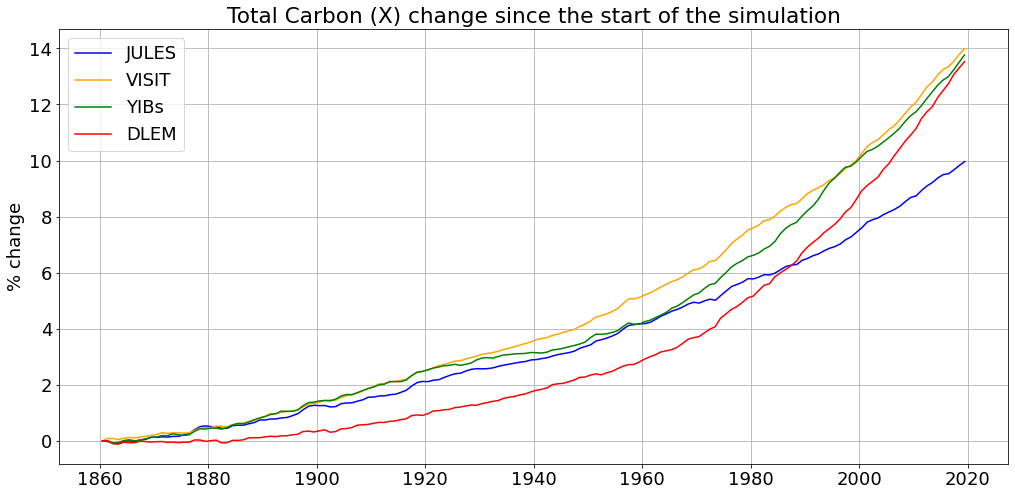

In [9]:
gh.plot_normalized_x(model_names=model_names,
                     delta_t_val=delta_t_val,
                     test_arg_list=test_arg_list,
                     model_cols=model_cols,
                     part=1,
                     averaging=12*30//delta_t_val,
                     overlap=True
                     )

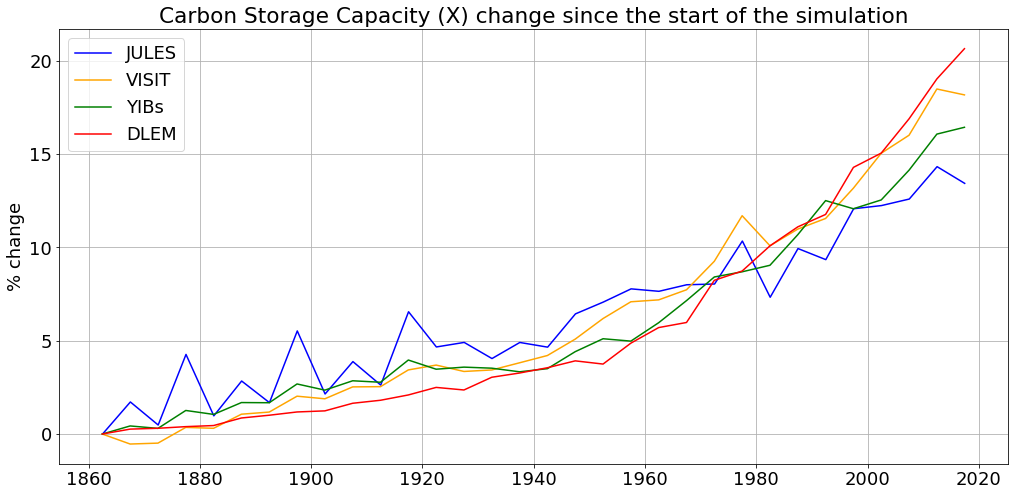

In [10]:
gh.plot_normalized_xc(model_names=model_names,
                      test_arg_list=test_arg_list,
                      delta_t_val=delta_t_val, 
                      model_cols=model_cols,
                      part=1,
                      averaging=12*30*5//delta_t_val,
                      overlap=True
                     )

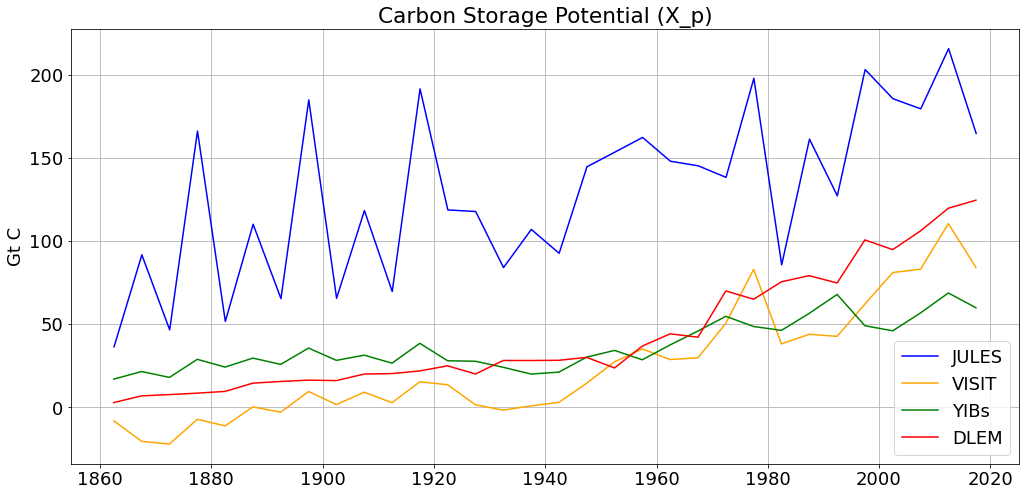

In [11]:
gh.plot_xp(model_names=model_names,
           test_arg_list=test_arg_list,
           delta_t_val=delta_t_val, 
           model_cols=model_cols,
           part=1,
           averaging=12*30*5//delta_t_val,
           overlap=True
          )

In [12]:
# gh.plot_u(model_names=model_names,
#           test_arg_list=test_arg_list,
#           delta_t_val=delta_t_val, 
#           model_cols=model_cols,
#           part=1,
#           averaging=30*12*5//delta_t_val,
#           overlap=True
#          )

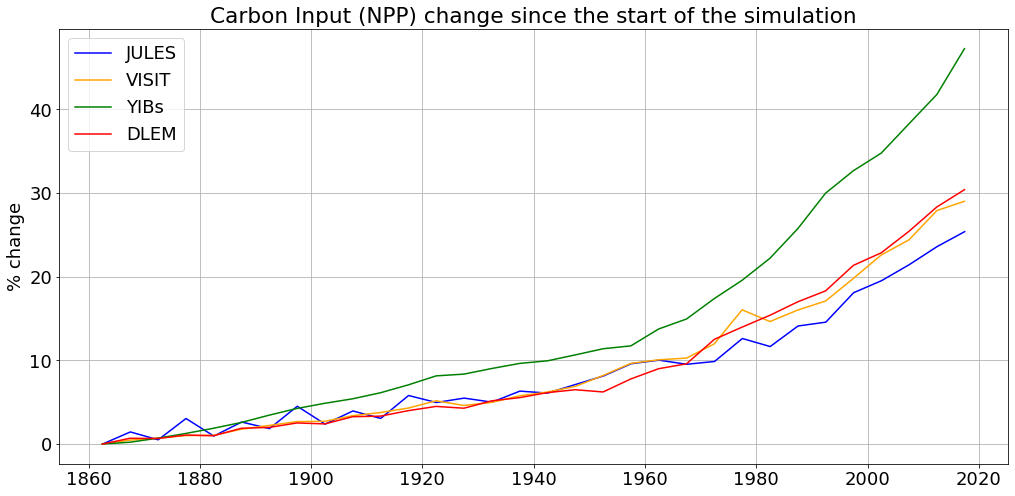

In [13]:
gh.plot_normalized_u(model_names=model_names,
                     test_arg_list=test_arg_list,
                     delta_t_val=delta_t_val, 
                     model_cols=model_cols,
                     part=1,
                     averaging=12*30*5//delta_t_val,
                     overlap=True
                     )

In [14]:
# gh.plot_rt(model_names=model_names,
#            test_arg_list=test_arg_list,
#            delta_t_val=delta_t_val, 
#            model_cols=model_cols,
#            part=1,
#            averaging=12*30//delta_t_val,
#            overlap=True
#           )

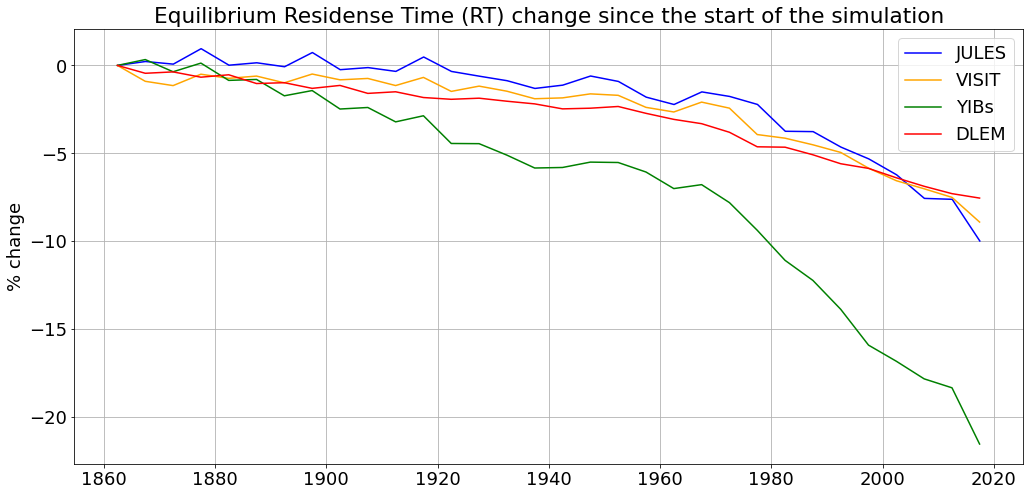

In [15]:
gh.plot_normalized_rt(model_names=model_names,
                      test_arg_list=test_arg_list,
                     delta_t_val=delta_t_val, 
                     model_cols=model_cols,
                     part=1,
                     averaging=12*30*5//delta_t_val,
                     overlap=True
                     )

## Contribution of Residense Time and C Input to the Differences in C Storage Capacity

In [16]:
# # mm test for two files,
# # fixme mm 8-12: 
# # test_args_dictionary={mf: gh.test_args(mf) for mf in model_folders}

# mf_1="yz_jules"
# mf_2="kv_visit2"
# gh.plot_attribution_X_c(
#     mf_1=mf_1,
#     mf_2=mf_2,
#     ta_1=test_args_dictionary[mf_1],
#     ta_2=test_args_dictionary[mf_2],
#     delta_t_val=delta_t_val,
#     part=1
# )


Attribution of difference in C storage capacity between JULES and VISIT


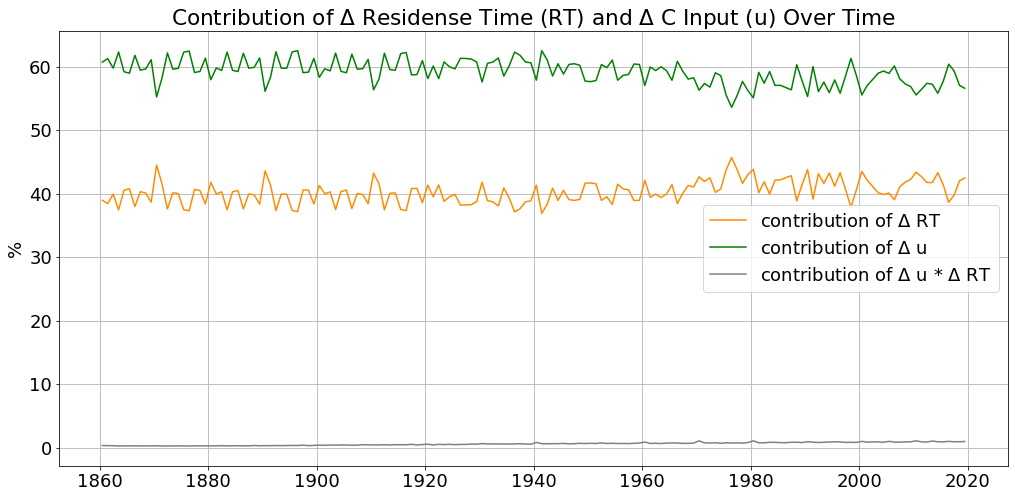

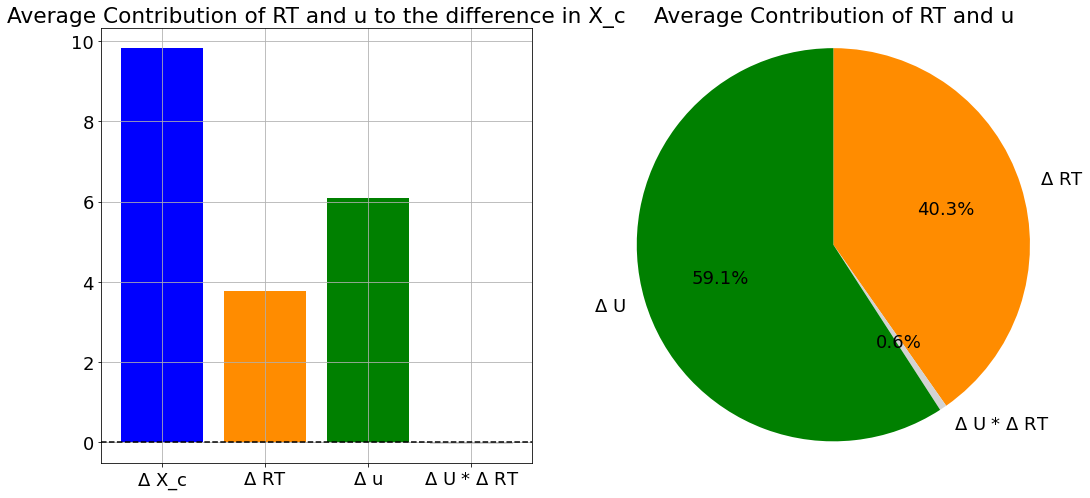

Attribution of difference in C storage capacity between JULES and YIBs


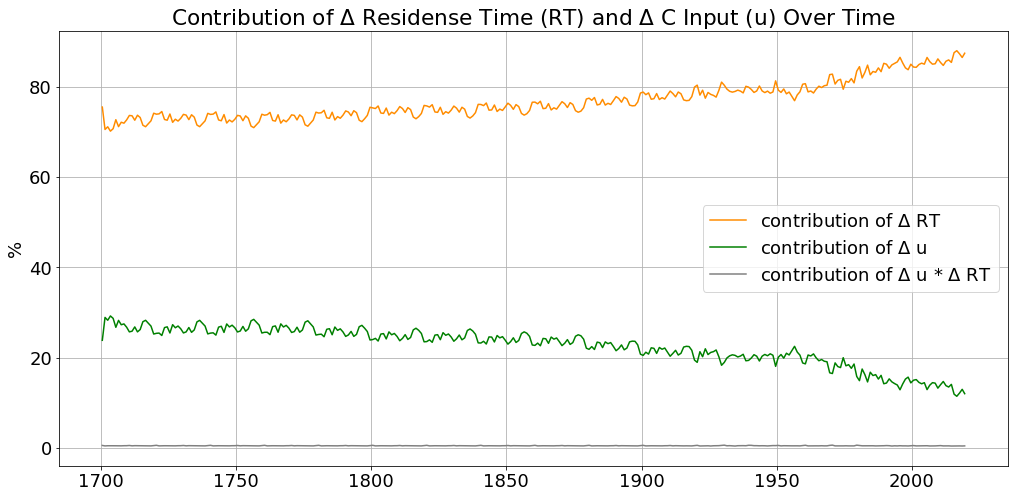

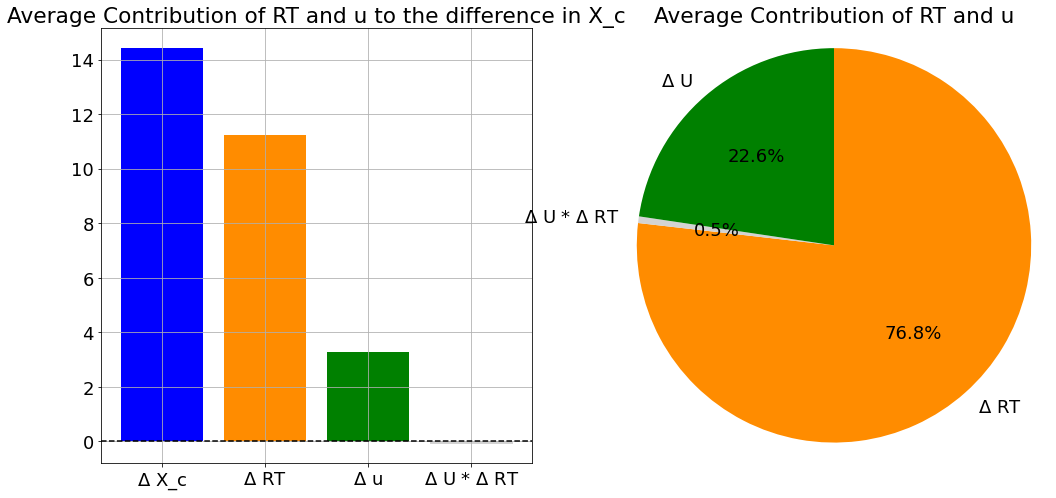

Attribution of difference in C storage capacity between JULES and DLEM


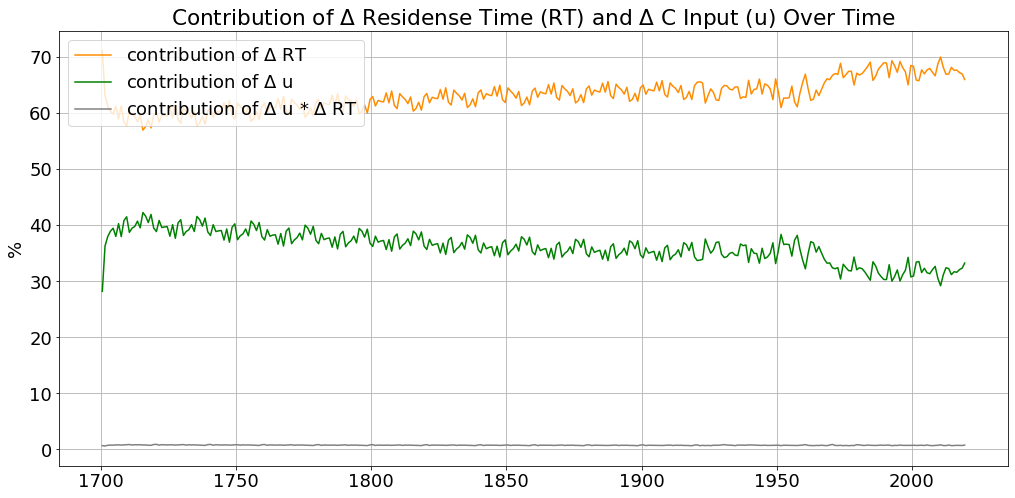

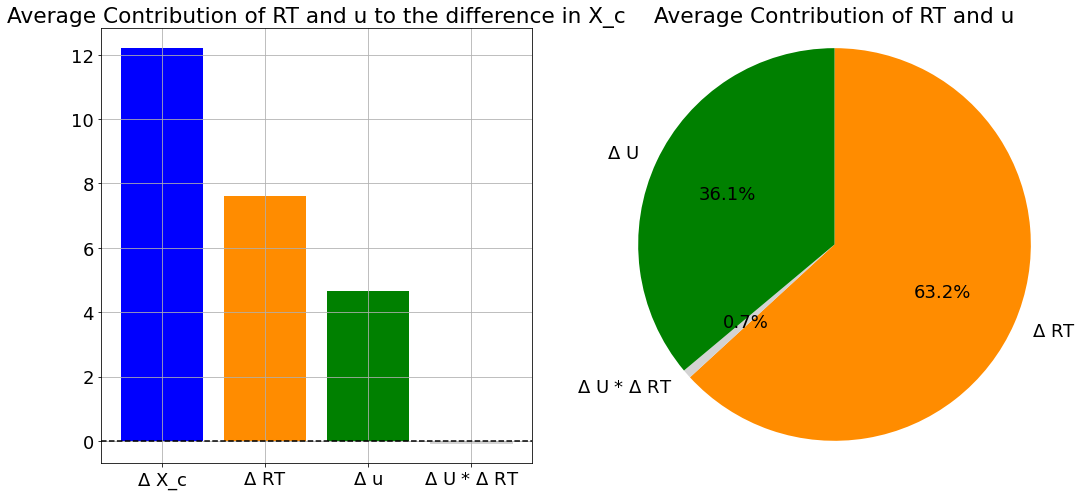

Attribution of difference in C storage capacity between VISIT and YIBs


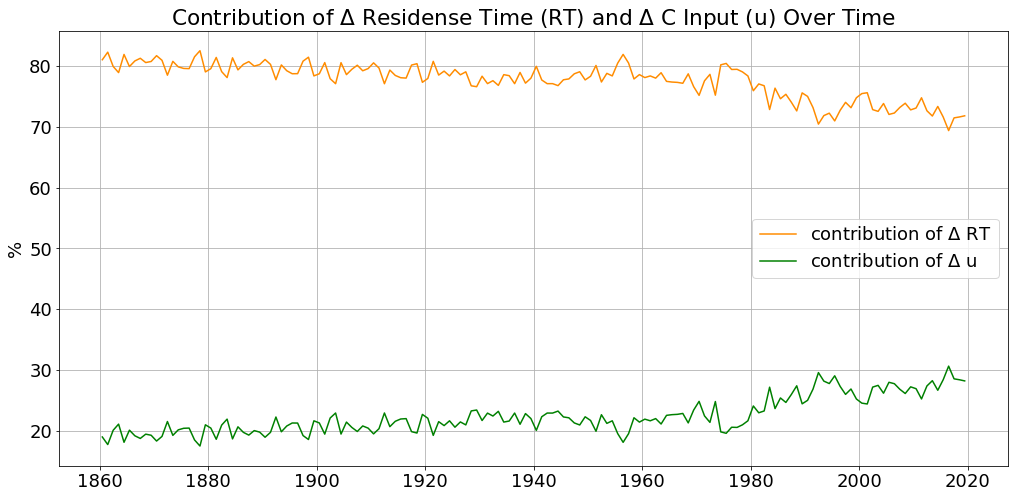

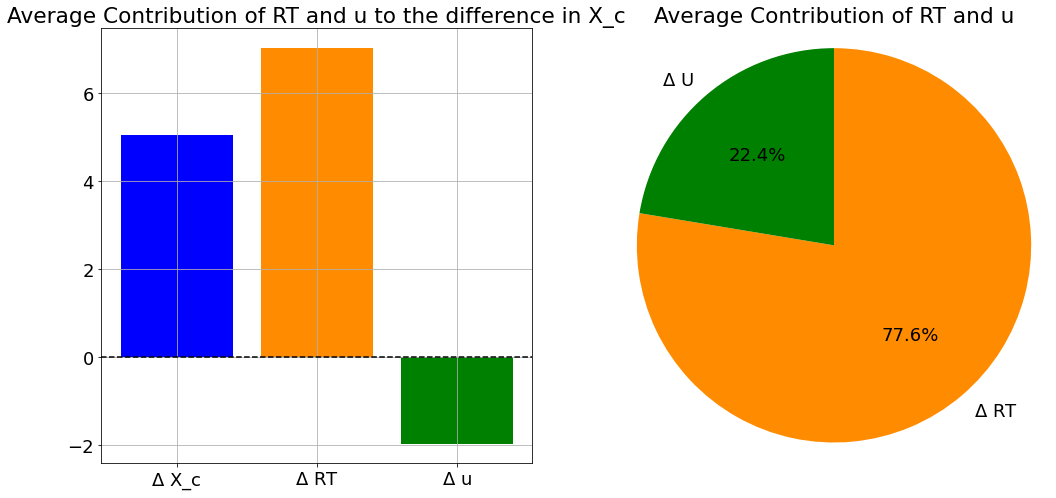

Attribution of difference in C storage capacity between VISIT and DLEM


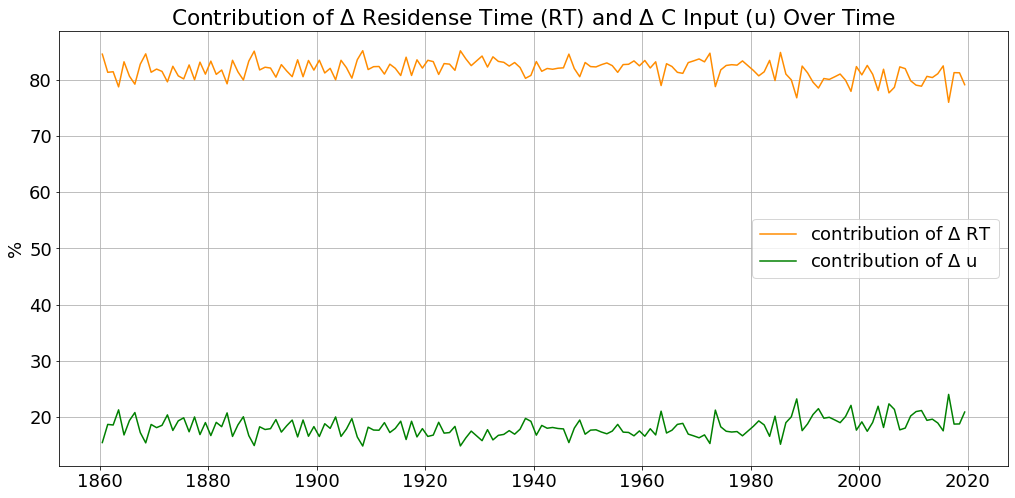

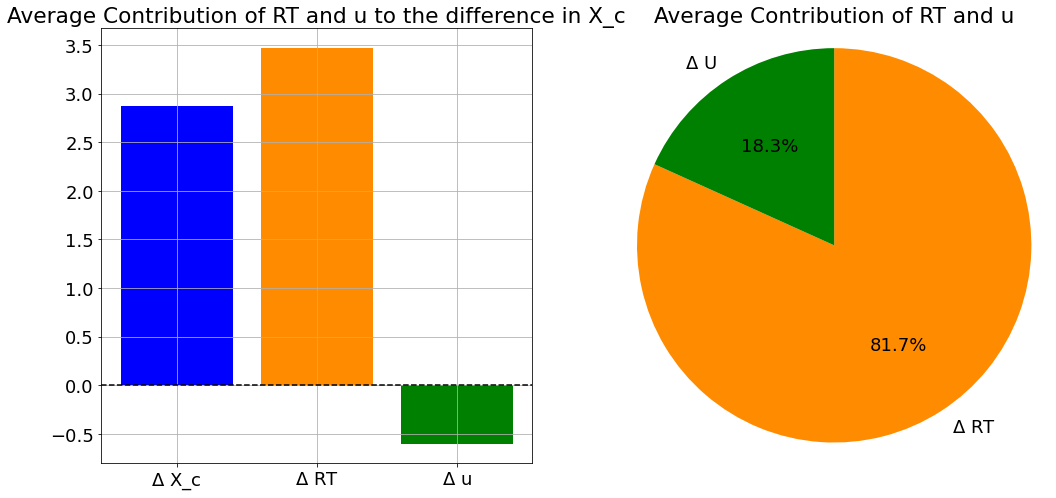

Attribution of difference in C storage capacity between YIBs and DLEM


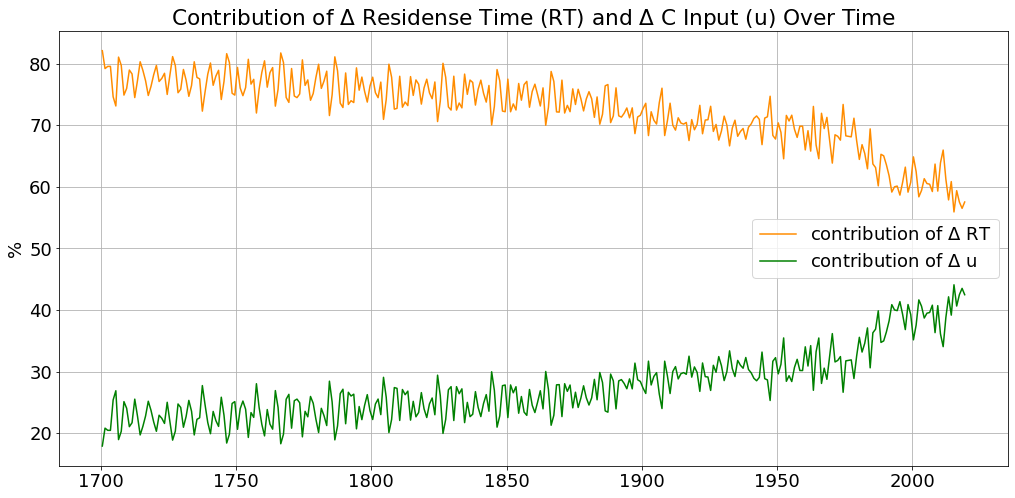

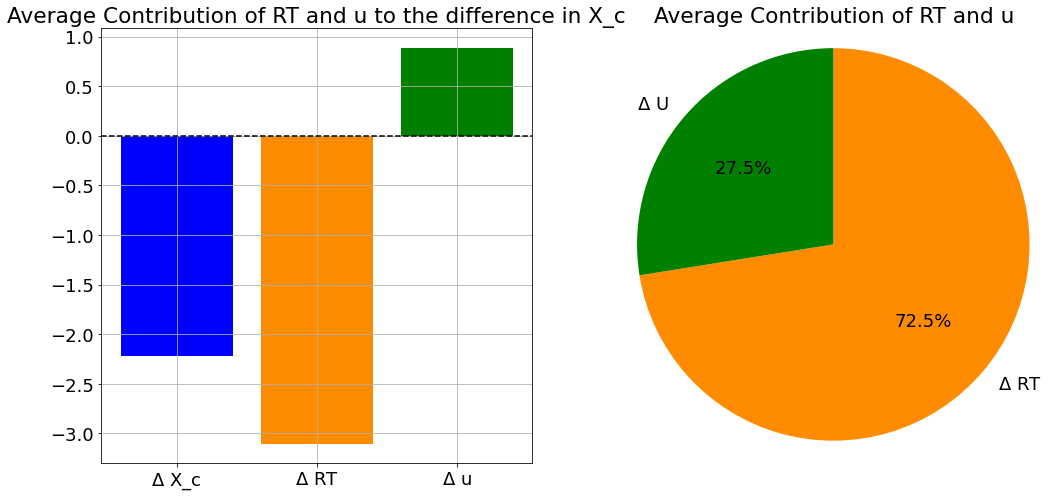

In [17]:
count_rt_weighted=0
count_u_weighted=0
count_combined_weighted=0
count_delta_x_c=0
for i in range(len(model_folders)-1):
    j=i
    while j<len(model_folders)-1:
        j+=1
        mf_1=model_folders[i]
        mf_2=model_folders[j]
        ta_1=test_arg_list[i]
        ta_2=test_arg_list[j]
        print("Attribution of difference in C storage capacity between "+model_names[mf_1]+" and "+model_names[mf_2])
        rt,u,combined,delta_x_c=gh.plot_attribution_X_c(mf_1=mf_1, mf_2=mf_2, ta_1=ta_1,ta_2=ta_2, delta_t_val=delta_t_val, part=1)
        count_rt_weighted=count_rt_weighted+rt*abs(delta_x_c)
        count_u_weighted=count_u_weighted+u*abs(delta_x_c)
        count_combined_weighted=count_combined_weighted+combined*abs(delta_x_c)
        count_delta_x_c=count_delta_x_c+abs(delta_x_c)

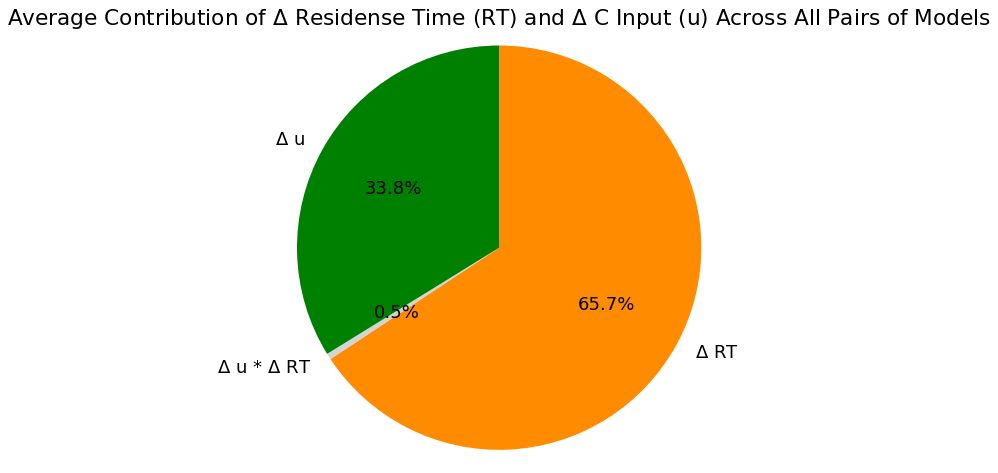

In [18]:
overall_rt_perc=count_rt_weighted/count_delta_x_c
overall_u_perc=count_u_weighted/count_delta_x_c
overall_combined_perc=count_combined_weighted/count_delta_x_c

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
fig1=plt.figure(figsize=(8,8))
ax1 = fig1.subplots()
if overall_combined_perc > 0.001:
    ax1.pie([overall_rt_perc, overall_combined_perc, overall_u_perc], 
            labels=('$\Delta$ RT', ' $\Delta$ u * $\Delta$ RT', '$\Delta$ u'), 
            autopct='%1.1f%%',
            startangle=90, counterclock=False, colors=("darkorange", "lightgrey", "green"))
else: 
    ax1.pie([overall_rt_perc, overall_u_perc], 
            labels= ('$\Delta$ RT', '$\Delta$ u'), 
            autopct='%1.1f%%',
            startangle=90, counterclock=False, colors=("darkorange", "green"))    
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Average Contribution of $\Delta$ Residense Time (RT) and $\Delta$ C Input (u) Across All Pairs of Models')
plt.show()